# Datasets

In [2]:
from data import load_UNINet, load_AUCS, load_MIT, load_Cora, display_MLG
%reload_ext autoreload
%autoreload 2

## The UCINet Datsets 

Multi Layer Graph datasets are downloaded from this website:
http://vlado.fmf.uni-lj.si/pub/networks/data/UciNet/UciData.htm

Descriptions on each dataset can be found there. 

Displaying kapmine dataset


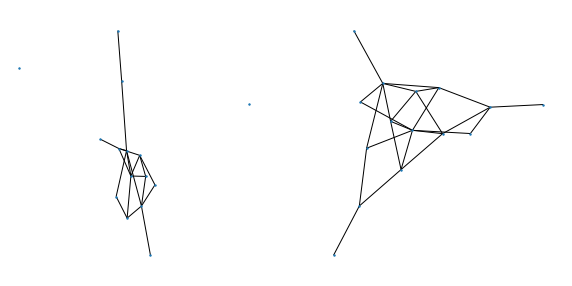

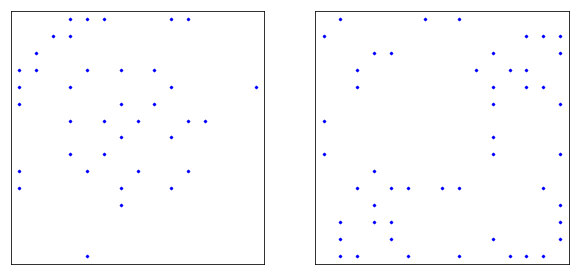

Displaying bktec dataset


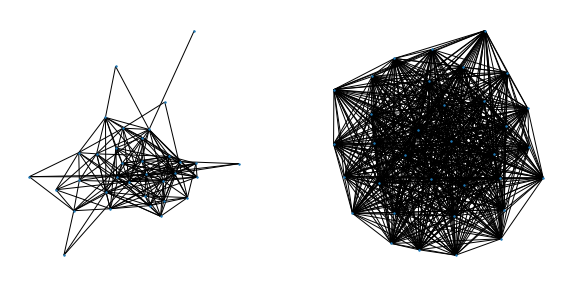

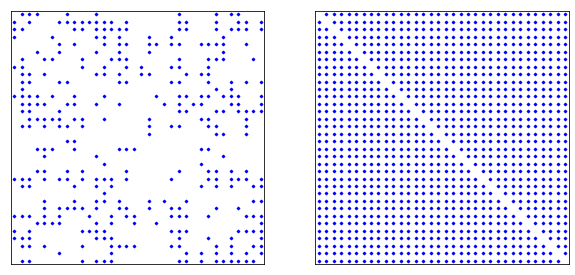

Displaying padgett dataset


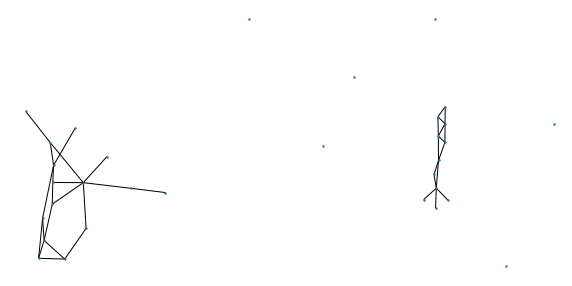

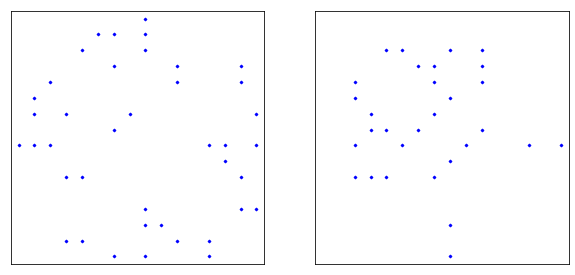

In [3]:
dataset_paths = {
    "kapmine" : 'datasets/UCINet/kapmine.dat',
    "bktec" : 'datasets/UCINet/bktec_processed.dat',
    "padgett" : 'datasets/UCINet/padgett.dat'
}

for dataset_name, dataset_path in dataset_paths.items():
    MLG, layer_labels, node_labels = load_UNINet(dataset_path)
    print(f"Displaying {dataset_name} dataset")
    display_MLG(MLG, layer_labels)

## The AUCS dataset

### Description of Dataset
This dataset is downloaded from https://github.com/justin830827/Community-Detection-in-Multilayer-Graph/blob/master/data/ . In this graph, the multiple layers represent relationships between 61 employees of a University department in five different aspects: (i) coworking, (ii) having lunch together, (iii) Facebook friendship, (iv) o✏ine friendship (having fun together), and (v) coauthor-ship.

### Layers
* Facebook,UNDIRECTED
* Lunch,UNDIRECTED
* Coauthor,UNDIRECTED
* Leisure,UNDIRECTED
* Work,UNDIRECTED
### ACTOR ATTRIBUTES
* ResearchGroup,STRING
* Role,STRING

Displaying AUCS dataset


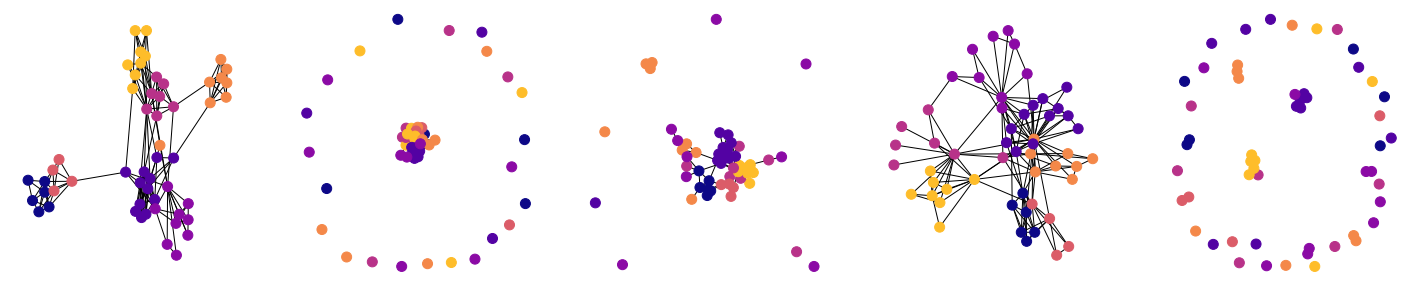

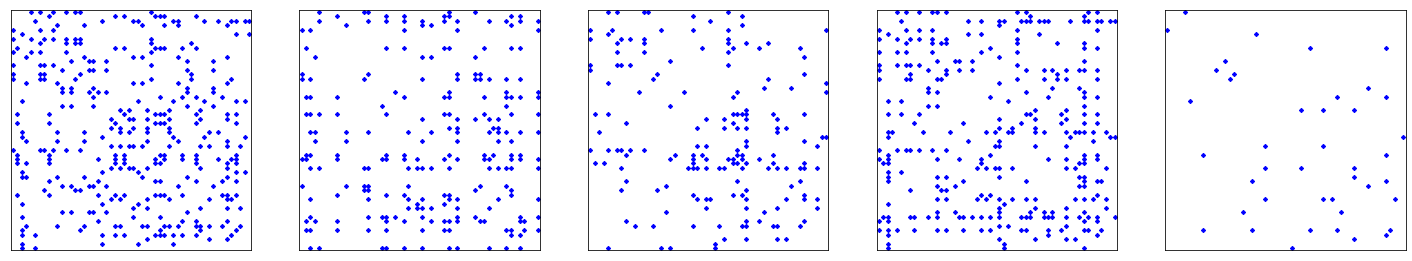

In [4]:
MLG, layer_labels, true_labels = load_AUCS()
print("Displaying AUCS dataset")
display_MLG(MLG, layer_labels, true_labels,node_size=100,markersize=3)

In [5]:
from collections import Counter
print(Counter(true_labels))

Counter({1: 12, 2: 9, 5: 8, 6: 8, 3: 7, 0: 6, 4: 4})


# MIT Dataset

Displaying MIT dataset


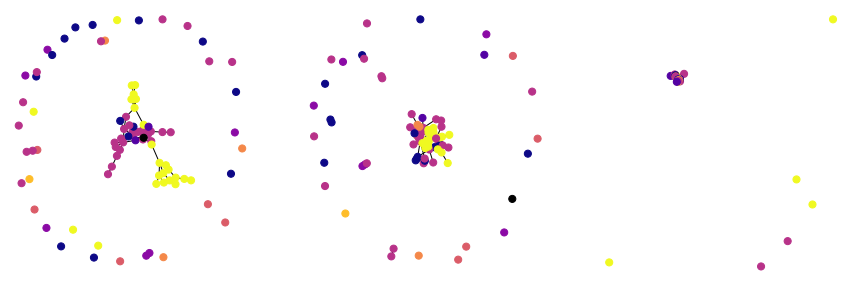

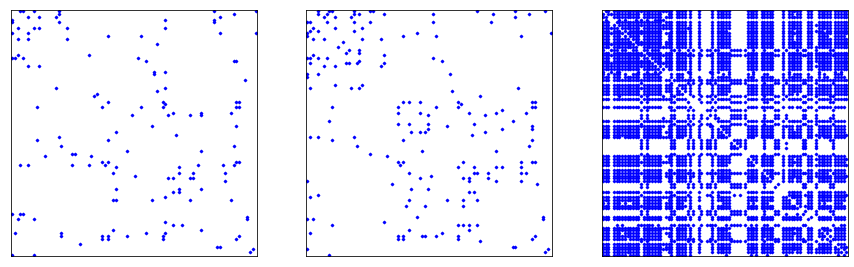

In [8]:
MLG, layer_labels, true_labels = load_MIT(preprocess=False)
print("Displaying MIT dataset")
display_MLG(MLG, layer_labels, true_labels,node_size=50,markersize=2)

In [9]:
from collections import Counter
print(Counter(true_labels))

Counter({'mlgrad': 33, 'sloan': 25, '1styeargrad ': 14, 'mlfrosh': 6, 'mlstaff': 5, 'mlurop': 3, 'grad': 2, 'professor': 1, 'sloan_2': 1})


# Cora dataset v2

Displaying Cora dataset


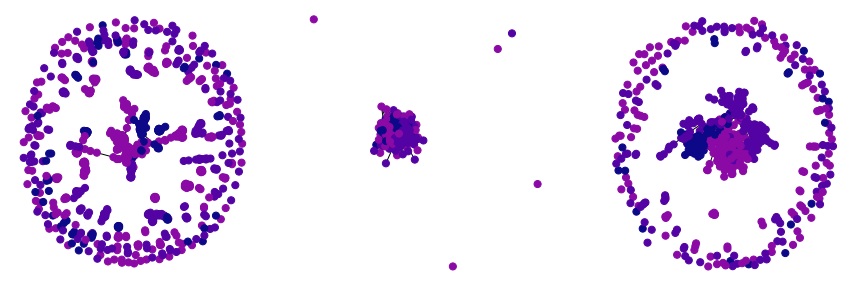

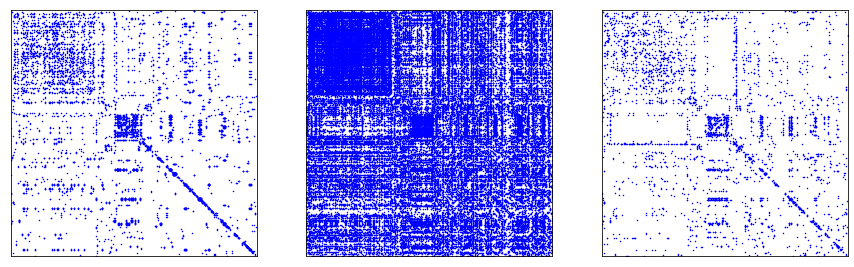

In [7]:
MLG, layer_labels, true_labels = load_Cora(preprocess=False)
print("Displaying Cora dataset")
display_MLG(MLG, layer_labels, true_labels,node_size=50,markersize=0.5)